In [1]:
# Library

import numpy as np
import pandas as pd
import keras
import csv
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, Embedding, BatchNormalization, Input, Add
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.metrics import f1_score, roc_auc_score, recall_score, confusion_matrix
from keras.callbacks import TensorBoard, ModelCheckpoint, CSVLogger, LearningRateScheduler
from keras import regularizers
from keras.models import Model
from keras.optimizers import Adam, SGD
from time import time


Using TensorFlow backend.


In [2]:
# Read sample from Dataset

with open('fixed_sequences_length_21_PELM/Group_Phos_S_w21_PELM_pos.fasta', 'r') as f:
    PELM_s_positif_txt = f.readlines()
with open('fixed_sequences_length_21_PELM/Group_Phos_T_w21_PELM_pos.fasta', 'r') as f:
    PELM_t_positif_txt = f.readlines()
with open('fixed_sequences_length_21_PELM/Group_Phos_Y_w21_PELM_pos.fasta', 'r') as f:
    PELM_y_positif_txt = f.readlines()
with open('fixed_sequences_length_21_PELM/Group_Phos_S_w21_PELM_neg.fasta', 'r') as f:
    PELM_s_negatif_txt = f.readlines()
with open('fixed_sequences_length_21_PELM/Group_Phos_T_w21_PELM_neg.fasta', 'r') as f:
    PELM_t_negatif_txt = f.readlines()
with open('fixed_sequences_length_21_PELM/Group_Phos_Y_w21_PELM_neg.fasta', 'r') as f:
    PELM_y_negatif_txt = f.readlines()
    
# with open('fixed_sequences_length_21_PPA/S_IDS_pos.fasta', 'r') as f:
#     PPA_s_positif_txt = f.readlines()
# with open('fixed_sequences_length_21_PPA/T_IDS_pos.fasta', 'r') as f:
#     PPA_t_positif_txt = f.readlines()
# with open('fixed_sequences_length_21_PPA/Y_IDS_pos.fasta', 'r') as f:
#     PPA_y_positif_txt = f.readlines()
# with open('fixed_sequences_length_21_PPA/S_IDS_neg.fasta', 'r') as f:
#     PPA_s_negatif_txt = f.readlines()
# with open('fixed_sequences_length_21_PPA/T_IDS_neg.fasta', 'r') as f:
#     PPA_t_negatif_txt = f.readlines()
# with open('fixed_sequences_length_21_PPA/Y_IDS_neg.fasta', 'r') as f:
#     PPA_y_negatif_txt = f.readlines()

# Pick the window 9

PELM_s_positif = np.array([])
for i in range(1,len(PELM_s_positif_txt),2):
    temp = PELM_s_positif_txt[i]
    temp1 = temp[0:21]
    temp2 = list(temp1)
    PELM_s_positif = np.append(PELM_s_positif, temp2)
print('PELM Dataset, S positive shape: ', PELM_s_positif.reshape(int(len(PELM_s_positif)/21),21).shape)

PELM_t_positif = np.array([])
for i in range(1,len(PELM_t_positif_txt),2):
    temp = PELM_t_positif_txt[i]
    temp1 = temp[0:21]
    temp2 = list(temp1)
    PELM_t_positif = np.append(PELM_t_positif, temp2)
print('PELM Dataset, T positive shape: ', PELM_t_positif.reshape(int(len(PELM_t_positif)/21),21).shape)
    
PELM_y_positif = np.array([])
for i in range(1,len(PELM_y_positif_txt),2):
    temp = PELM_y_positif_txt[i]
    temp1 = temp[0:21]
    temp2 = list(temp1)
    PELM_y_positif = np.append(PELM_y_positif, temp2)
print('PELM Dataset, Y positive shape: ', PELM_y_positif.reshape(int(len(PELM_y_positif)/21),21).shape)

PELM_s_negatif = np.array([])
for i in range(1,len(PELM_s_negatif_txt),2):
    temp = PELM_s_negatif_txt[i]
    temp1 = temp[0:21]
    temp2 = list(temp1)
    PELM_s_negatif = np.append(PELM_s_negatif, temp2)
print('PELM Dataset, S negative shape: ', PELM_s_negatif.reshape(int(len(PELM_s_negatif)/21),21).shape)

PELM_t_negatif = np.array([])
for i in range(1,len(PELM_t_negatif_txt),2):
    temp = PELM_t_negatif_txt[i]
    temp1 = temp[0:21]
    temp2 = list(temp1)
    PELM_t_negatif = np.append(PELM_t_negatif, temp2)
print('PELM Dataset, T negative shape: ', PELM_t_negatif.reshape(int(len(PELM_t_negatif)/21),21).shape)
    
PELM_y_negatif = np.array([])
for i in range(1,len(PELM_y_negatif_txt),2):
    temp = PELM_y_negatif_txt[i]
    temp1 = temp[0:21]
    temp2 = list(temp1)
    PELM_y_negatif = np.append(PELM_y_negatif, temp2)
print('PELM Dataset, Y negative shape: ', PELM_y_negatif.reshape(int(len(PELM_y_negatif)/21),21).shape)

print()

# PPA_s_positif = np.array([])
# for i in range(1,len(PPA_s_positif_txt),2):
#     temp = PPA_s_positif_txt[i]
#     temp1 = temp[0:21]
#     temp2 = list(temp1)
#     PPA_s_positif = np.append(PPA_s_positif, temp2)
# print('PPA Dataset, S positive shape: ', PPA_s_positif.reshape(int(len(PPA_s_positif)/21),21).shape)

# PPA_t_positif = np.array([])
# for i in range(1,len(PPA_t_positif_txt),2):
#     temp = PPA_t_positif_txt[i]
#     temp1 = temp[0:21]
#     temp2 = list(temp1)
#     PPA_t_positif = np.append(PPA_t_positif, temp2)
# print('PPA Dataset, T positive shape: ', PPA_t_positif.reshape(int(len(PPA_t_positif)/21),21).shape)
    
# PPA_y_positif = np.array([])
# for i in range(1,len(PPA_y_positif_txt),2):
#     temp = PPA_y_positif_txt[i]
#     temp1 = temp[0:21]
#     temp2 = list(temp1)
#     PPA_y_positif = np.append(PPA_y_positif, temp2)
# print('PPA Dataset, Y positive shape: ', PPA_y_positif.reshape(int(len(PPA_y_positif)/21),21).shape)


# PPA_s_negatif = np.array([])
# for i in range(1,len(PPA_s_negatif_txt),2):
#     temp = PPA_s_negatif_txt[i]
#     temp1 = temp[0:21]
#     temp2 = list(temp1)
#     PPA_s_negatif = np.append(PPA_s_negatif, temp2)
# print('PPA Dataset, S negative shape: ', PPA_s_negatif.reshape(int(len(PPA_s_negatif)/21),21).shape)

# PPA_t_negatif = np.array([])
# for i in range(1,len(PPA_t_negatif_txt),2):
#     temp = PPA_t_negatif_txt[i]
#     temp1 = temp[0:21]
#     temp2 = list(temp1)
#     PPA_t_negatif = np.append(PPA_t_negatif, temp2)
# print('PPA Dataset, T negative shape: ', PPA_t_negatif.reshape(int(len(PPA_t_negatif)/21),21).shape)
    
# PPA_y_negatif = np.array([])
# for i in range(1,len(PPA_y_negatif_txt),2):
#     temp = PPA_y_negatif_txt[i]
#     temp1 = temp[0:21]
#     temp2 = list(temp1)
#     PPA_y_negatif = np.append(PPA_y_negatif, temp2)
# print('PPA Dataset, Y negative shape: ', PPA_y_negatif.reshape(int(len(PPA_y_negatif)/21),21).shape)


PELM Dataset, S positive shape:  (1941, 21)
PELM Dataset, T positive shape:  (833, 21)
PELM Dataset, Y positive shape:  (423, 21)
PELM Dataset, S negative shape:  (1459, 21)
PELM Dataset, T negative shape:  (1258, 21)
PELM Dataset, Y negative shape:  (423, 21)



In [3]:
# Choose Dataset to train, make sure correspond with negative dataset

dataset_pos = PELM_s_positif
dataset_neg = PELM_s_negatif
string_name = 'PELM_s'

# Expand dimension, Reshape and Create Label

sequenceLP = int(len(dataset_pos)/21)
dataset_pos = np.expand_dims(dataset_pos, axis=0)
dataset_pos = dataset_pos.reshape(sequenceLP,21)
label_pos = np.ones((sequenceLP,), dtype=int)
label_pos = np.expand_dims(label_pos, axis=0)
label_pos = label_pos.reshape(sequenceLP,1)

sequenceLN = int(len(dataset_neg)/21)
dataset_neg = np.expand_dims(dataset_neg, axis=0)
dataset_neg = dataset_neg.reshape(sequenceLN,21)
label_neg = np.zeros((sequenceLN,), dtype=int)
label_neg = np.expand_dims(label_neg, axis=0)
label_neg = label_neg.reshape(sequenceLN,1)

# Validate

print('Positive Dataset shape: ', dataset_pos.shape)
print('Positive Label shape: ', label_pos.shape)
print('Negative Dataset shape: ', dataset_neg.shape)
print('Negative Label shape: ', label_neg.shape)


Positive Dataset shape:  (1941, 21)
Positive Label shape:  (1941, 1)
Negative Dataset shape:  (1459, 21)
Negative Label shape:  (1459, 1)


In [4]:
# Dataset preparation

dataset_X = np.concatenate((dataset_pos, dataset_neg), axis=0, out=None)
dataset_Y = np.concatenate((label_pos, label_neg), axis=0, out=None)

# Tokenizing, Unique character got its own number

asam = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(asam)
dataset_X_token = []
for i in range(len(dataset_X)):
    temp = tokenizer.texts_to_sequences(dataset_X[i])
    dataset_X_token = np.append(dataset_X_token, temp)

dataset_X_token = dataset_X_token-1
dataset_X_token = dataset_X_token.reshape(len(dataset_X),21)

# Onehot

dataset_X_token_onehot = to_categorical(dataset_X_token)
dataset_X_token_onehot = np.expand_dims(dataset_X_token_onehot, axis=3)
dataset_X_token_onehot = dataset_X_token_onehot.reshape(len(dataset_X),21,20,1)

dataset_Y_onehot = to_categorical(dataset_Y)

# Spliting Dataset

validation_size = 0.2
randomS = 16
train_X, valid_X, train_Y, valid_Y = train_test_split(dataset_X_token, dataset_Y_onehot, 
                                                      test_size=validation_size, random_state=randomS)

# Validation

print('Training sample shape: ', train_X.shape)
print('Training label shape: ', train_Y.shape)
print('Validation sample shape: ', valid_X.shape)
print('Validation label shape: ', valid_Y.shape)


Training sample shape:  (2720, 21)
Training label shape:  (2720, 2)
Validation sample shape:  (680, 21)
Validation label shape:  (680, 2)


In [25]:
# Neural Network Modeling

epochs = 100

model = Sequential()
model.add(Embedding(20, 128, input_length=21))
model.add(Flatten(data_format=None))
model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
model.add(Dropout(0.8, noise_shape=None, seed=None))
model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
model.add(Dropout(0.8, noise_shape=None, seed=None))
model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
model.add(Dropout(0.8, noise_shape=None, seed=None))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

def scheduler(epoch):
    if epoch > 60:
        return 0.00001
    elif epoch > 30:
        return 0.0001
    else:
        return 0.001 

lr_schedule= LearningRateScheduler(scheduler)
checkpoint = ModelCheckpoint('weight_best.hdf5', monitor='val_loss', verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
callback_list = [checkpoint, lr_schedule]

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 21, 128)           2560      
_________________________________________________________________
flatten_8 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               344192    
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
__________

In [26]:
# Train The Model

model_train = model.fit(train_X, train_Y, epochs=epochs, batch_size=32, 
                        validation_data=(valid_X, valid_Y), callbacks=callback_list)

Train on 2720 samples, validate on 680 samples
Epoch 1/100
2720/2720 [==============================] - 1s 452us/step - loss: 0.8752 - acc: 0.5048 - val_loss: 0.6906 - val_acc: 0.5235
Epoch 2/100
2720/2720 [==============================] - 0s 79us/step - loss: 0.8522 - acc: 0.5136 - val_loss: 0.6879 - val_acc: 0.5456
Epoch 3/100
2720/2720 [==============================] - 0s 80us/step - loss: 0.8330 - acc: 0.5246 - val_loss: 0.6862 - val_acc: 0.5426
Epoch 4/100
2720/2720 [==============================] - 0s 80us/step - loss: 0.8321 - acc: 0.5199 - val_loss: 0.6846 - val_acc: 0.5500
Epoch 5/100
2720/2720 [==============================] - 0s 80us/step - loss: 0.8378 - acc: 0.5048 - val_loss: 0.6833 - val_acc: 0.5471
Epoch 6/100
2720/2720 [==============================] - 0s 81us/step - loss: 0.7922 - acc: 0.5305 - val_loss: 0.6823 - val_acc: 0.5412
Epoch 7/100
2720/2720 [==============================] - 0s 81us/step - loss: 0.7919 - acc: 0.5272 - val_loss: 0.6810 - val_acc: 0.5426


2720/2720 [==============================] - 0s 88us/step - loss: 0.6998 - acc: 0.5607 - val_loss: 0.6623 - val_acc: 0.5441
Epoch 61/100
2720/2720 [==============================] - 0s 90us/step - loss: 0.6978 - acc: 0.5540 - val_loss: 0.6622 - val_acc: 0.5441
Epoch 62/100
2720/2720 [==============================] - 0s 89us/step - loss: 0.6887 - acc: 0.5680 - val_loss: 0.6622 - val_acc: 0.5441
Epoch 63/100
2720/2720 [==============================] - 0s 89us/step - loss: 0.7118 - acc: 0.5426 - val_loss: 0.6622 - val_acc: 0.5441
Epoch 64/100
2720/2720 [==============================] - 0s 79us/step - loss: 0.6955 - acc: 0.5669 - val_loss: 0.6621 - val_acc: 0.5441
Epoch 65/100
2720/2720 [==============================] - 0s 79us/step - loss: 0.6943 - acc: 0.5643 - val_loss: 0.6621 - val_acc: 0.5441
Epoch 66/100
2720/2720 [==============================] - 0s 85us/step - loss: 0.7006 - acc: 0.5585 - val_loss: 0.6621 - val_acc: 0.5441
Epoch 67/100
2720/2720 [==============================

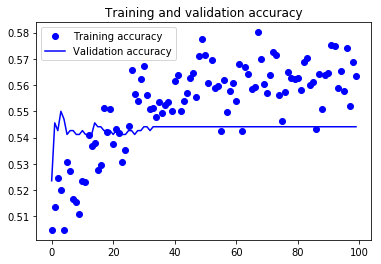

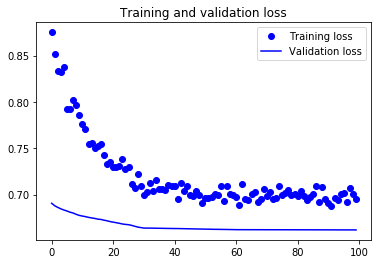

In [27]:
# Plot The Training Accuracy

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('results/Acc_result_{}.png'.format(string_name))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('results/Loss_result_{}.png'.format(string_name))
plt.show()

In [ ]:
# Model Score Summary

model.load_weights("weight_best.hdf5")
y_pred = np.argmax(model.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('F1 :', f1)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('MCC :', mcc)

with open('results/summary_{}.csv'.format(string_name), mode='w') as summary_file:
    employee_writer = csv.writer(summary_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['Accuracy :', accu])
    employee_writer.writerow(['AUC :', auc])
    employee_writer.writerow(['F1 :', f1])
    employee_writer.writerow(['Sensitivity :', sensi])
    employee_writer.writerow(['Specificity :', specificity])
    employee_writer.writerow(['MCC :', mcc])
    
    employee_writer.writerow([''])
    
    employee_writer.writerow(['TP :', tp])
    employee_writer.writerow(['FP :', fp])
    employee_writer.writerow(['TN :', tn])
    employee_writer.writerow(['FN :', fn])
    